# Digital House - Data Science a Distancia

## Trabajo Práctico 1

## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades

### Autores: Nahuel Bonfante, Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor

<p style="text-align:right;">Abril 2022</p>

#### Aspectos técnicos
La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión 4.11.0 build  3.21.6, Python 3.9.7


#### Librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

from tools import *

In [2]:
data_url = "../Data/properatti.csv"
data = pd.read_csv(data_url, encoding="utf-8")
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 26


#### Vemos de qué tipo son las variables:

In [3]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

#### Analizamos la cantidad de Nulos

In [4]:
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

#### Vemos el % de nulos que hay 

In [5]:
data.isnull().sum() / data.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

#### La variable target para el modelo es "price_aprox_usd", para eso, hacemos algunos análisis sobre la misma: 



In [6]:
#nos quedamos con la moneda de USD : 
data1 = data[data['currency'] == 'USD']
data1.shape

(87587, 26)

In [7]:
#validamos que la variable de precio coincida con el precio en dolares 
valores = data1['price'] == data1['price_aprox_usd']
valores.value_counts()

True    87587
dtype: int64

#### Eliminamos los valores nulos de la variable Target. 

In [8]:
#limpiamos los que NaN en el precio
data = data.dropna(axis=0, how='any', subset=['price_aprox_usd'])
data_clean = data

In [9]:
#chequeamos que ya tenemos limpio el precio
data_clean.isnull().sum() / data.shape[0]

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000228
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.168158
lat-lon                       0.419224
lat                           0.419224
lon                           0.419224
price                         0.000000
currency                      0.000010
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.316873
surface_covered_in_m2         0.130443
price_usd_per_m2              0.319343
price_per_m2                  0.130463
floor                         0.931396
rooms                         0.607390
expenses                      0.868604
properati_url                 0.000000
description                   0.000020
title                         0.000000
image_thumbnail          

In [10]:
#Vemos cuantas categorías tenemos por variable 
data_clean.nunique()

Unnamed: 0                    100810
operation                          1
property_type                      4
place_name                       974
place_with_parent_names         1063
country_name                       1
state_name                        28
geonames_id                      569
lat-lon                        39739
lat                            39129
lon                            39152
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1538
surface_covered_in_m2            916
price_usd_per_m2               25566
price_per_m2                   25185
floor                            174
rooms                             28
expenses                         949
properati_url                 100810
description                    88392
title                          62765
image_thumbnail                95992
dtype: int64

### Análisis de distribución del DataFrame 

In [11]:
#Por provincia 
mask = data_clean['state_name'].value_counts().head(7).index
data_clean['state_name1'] = data_clean['state_name'].apply(lambda x : x if x in mask else 'otros') 
data_clean['state_name1'].value_counts()

vc_prov = data_clean.state_name1.value_counts() / data.shape[0] 
vc_prov

Capital Federal                 0.287848
Bs.As. G.B.A. Zona Norte        0.238647
Bs.As. G.B.A. Zona Sur          0.119879
Buenos Aires Costa Atlántica    0.089862
Córdoba                         0.089654
Bs.As. G.B.A. Zona Oeste        0.072741
Santa Fe                        0.053695
otros                           0.047674
Name: state_name1, dtype: float64

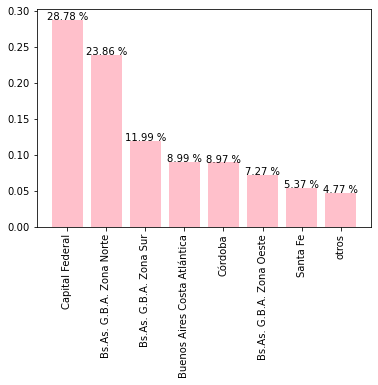

In [12]:
#Genero el plot
f = plt.plot()
ax = plt.bar(x = vc_prov.index, 
             height = vc_prov, 
             color = 'pink')

#Roto los axis del eje x para que se puedan leer.
plt.xticks(rotation = 90)

#Funcion que plotea el % de cada barra
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        leyenda = f'{round(y_list[i]*100, 2)} %'
        plt.text(x = i , y = y_list[i], s = leyenda, ha="center")
        
#Llamo a la funcion que plotea los valores de las x
add_value_label(x_list = vc_prov.index, y_list = vc_prov)

#### Se observa que el 80% está distribuido entre Capital Federal, BsAs GBA Zona Norte, BsAs GBA Zona Sur, Costa Atlántica y Córdoba.

In [13]:
vc_type = data_clean.property_type.value_counts() / data.shape[0] 
vc_type

apartment    0.591370
house        0.324521
PH           0.051781
store        0.032328
Name: property_type, dtype: float64

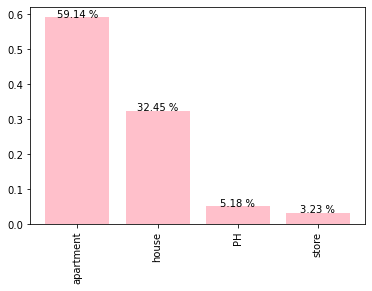

In [14]:
#Genero el plot
f = plt.plot()
ax = plt.bar(x = vc_type.index, 
             height = vc_type, 
             color = 'pink')

#Roto los axis del eje x para que se puedan leer.
plt.xticks(rotation = 90)

#Funcion que plotea el % de cada barra
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        leyenda = f'{round(y_list[i]*100, 2)} %'
        plt.text(x = i , y = y_list[i], s = leyenda, ha="center")
        
#Llamo a la funcion que plotea los valores de las x
add_value_label(x_list = vc_type.index, y_list = vc_type)

#### Se observa que el 59% de las propiedades son del tipo depto. 

#### Vemos un describe de la variable Target a ver como esta distribuida para entender los outliers

In [15]:
data_clean.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

<AxesSubplot:xlabel='price_aprox_usd', ylabel='Count'>

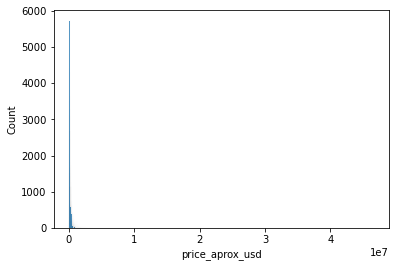

In [16]:
#ploteo para ver que tengo muchos outliers en precio.
sns.histplot(data=data_clean, x='price_aprox_usd')

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_aprox_usd'>

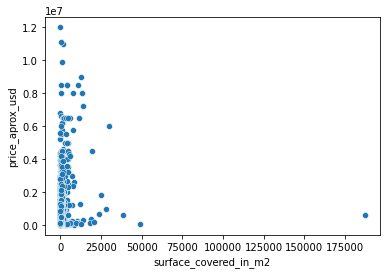

In [17]:
#Tiramos un primer grafico a ver cómo se correlaciona la superficie cubierta en mts2 con el precio. 
sns.scatterplot(x=data_clean['surface_covered_in_m2'], y=data['price_aprox_usd'])

In [18]:
data_clean[['price_aprox_usd', 'surface_total_in_m2']].corr()

,price_aprox_usd,surface_total_in_m2
price_aprox_usd,1.000000,0.301137
surface_total_in_m2,0.301137,1.000000


##### Observamos que nos da una correlación muy baja y que hay mucho ruido, por lo que es necesario aperturar más la correlación en otras variables. 

#### Eliminamos Outliers para las variables que vamos a correlacionar: 

In [19]:
#hacemos las iteraciones para place y para tipo. Elijo arbitrariamente cuanto quiero mostrar. 
#elijo los que tienen mas valores, y despues les paso un index para que solo me muestre el nombre del lugar
iterar_place=data_clean['place_name'].value_counts().head(300)
iterar_place['otro_place']=0
iterar_place = iterar_place.index

iterar_tipo=data_clean['property_type'].value_counts().head(2)
#Esto esta comentado para NO CONTEMPLAR los otros tipos en el calculo
# iterar_tipo['otro_tipo']=0
iterar_tipo = iterar_tipo.index

In [20]:
#todos los valores que no entren en alguna de las categorias recien planteadas, son metidas en "OTROS"
#Modificamos data_clean, pero en nuevas columnas

data_clean['place_name_alt'] = [x if x in iterar_place else 'otro_place' for x in data_clean['place_name']]
data_clean['property_type_alt'] = [x if x in iterar_tipo else 'otro_tipo' for x in data_clean['property_type']]

In [21]:
# data_clean.place_name.value_counts()
data_clean.place_name_alt.value_counts()

Córdoba                     6916
Mar del Plata               5966
Rosario                     4735
otro_place                  3478
Tigre                       3038
                            ... 
Luján de Cuyo                 22
Santa-Catalina                22
Loma Hermosa                  22
Albanueva Barrio Cerrado      22
San Miguel del Monte          22
Name: place_name_alt, Length: 301, dtype: int64

### Analizamos si conviene usar superficie cubierta o total: 

In [22]:
#minimo numero de casos para considerar lugar al hacer la correlacion:
min_value_count=100
#Maximo valor de correlaciones mostrados en la tabla
count_tabla_max=10

In [23]:
#Hago un ciclo for: basicamente aplico la funcion CHECK_CORR para cada dato. Todo lo demas es para que quede legible
corr_surf_total=[]

for tipo in iterar_tipo:
    count_tabla=0
    
    for place in iterar_place:
        
        #Formato para que sea legible (no aporta mucho al calculo)
        spaces= " "*(16-len(place))
        mask_conteo = np.logical_and(data_clean['place_name_alt']==place, data_clean['property_type_alt']==tipo)
        conteo= data_clean[ mask_conteo].shape[0]
        
        #Esta es la importante
        correlacion = round(check_corr(data_clean, place, tipo, ('price_aprox_usd', 'surface_total_in_m2')), 2)
        
       
         #Para descartar valores extremos, no muestro combinaciones con menos de x lugares (arbitrario)
        if conteo > min_value_count:
            corr_surf_total.append(correlacion)
            #Mostrar resultado en forma de tabla. Los primeros valores nada mas
            if count_tabla<=count_tabla_max:
                print(f' Lugar: {place} {spaces} \t // Tipo: {tipo} \t \t //corr: {correlacion} \t // conteo: {conteo}')
                count_tabla+=1
        

 Lugar: Córdoba           	 // Tipo: apartment 	 	 //corr: 0.66 	 // conteo: 4758
 Lugar: Mar del Plata     	 // Tipo: apartment 	 	 //corr: 0.76 	 // conteo: 4181
 Lugar: Rosario           	 // Tipo: apartment 	 	 //corr: 0.73 	 // conteo: 4140
 Lugar: Tigre             	 // Tipo: apartment 	 	 //corr: 0.72 	 // conteo: 1322
 Lugar: Nordelta          	 // Tipo: apartment 	 	 //corr: 0.67 	 // conteo: 1858
 Lugar: Belgrano          	 // Tipo: apartment 	 	 //corr: 0.89 	 // conteo: 2338
 Lugar: Palermo           	 // Tipo: apartment 	 	 //corr: 0.82 	 // conteo: 2258
 Lugar: Caballito         	 // Tipo: apartment 	 	 //corr: 0.87 	 // conteo: 1886
 Lugar: Pilar             	 // Tipo: apartment 	 	 //corr: 0.53 	 // conteo: 746
 Lugar: La Plata          	 // Tipo: apartment 	 	 //corr: 0.74 	 // conteo: 1041
 Lugar: Olivos            	 // Tipo: apartment 	 	 //corr: 0.8 	 // conteo: 1010
 Lugar: Córdoba           	 // Tipo: house 	 	 //corr: 0.48 	 // conteo: 1827
 Lugar: Mar del Plata 

In [24]:
#Maximo valor de correlaciones mostrados en la tabla
count_tabla_max=10

In [25]:
corr_surf_covered=[]

for tipo in iterar_tipo:
    count_tabla=0
    
    for place in iterar_place:
        
        #Formato para que sea legible (no aporta mucho al calculo)
        spaces= " "*(16-len(place))
        mask_conteo = np.logical_and(data_clean['place_name_alt']==place, data_clean['property_type_alt']==tipo)
        conteo= data_clean[ mask_conteo].shape[0]
        
        #Esta es la importante
        correlacion = round(check_corr(data_clean, place, tipo, ('price_aprox_usd', 'surface_covered_in_m2')), 2)
        
               
        #Para descartar valores extremos, no muestro combinaciones con menos de x lugares (arbitrario)
        if conteo > min_value_count:
            corr_surf_covered.append(correlacion)
            #Mostrar resultado en forma de tabla. Los primeros valores nada mas
            if count_tabla<=count_tabla_max:
                print(f' Lugar: {place} {spaces} \t // Tipo: {tipo} \t \t //corr: {correlacion} \t // conteo: {conteo}')
                count_tabla+=1


 Lugar: Córdoba           	 // Tipo: apartment 	 	 //corr: 0.62 	 // conteo: 4758
 Lugar: Mar del Plata     	 // Tipo: apartment 	 	 //corr: 0.75 	 // conteo: 4181
 Lugar: Rosario           	 // Tipo: apartment 	 	 //corr: 0.77 	 // conteo: 4140
 Lugar: Tigre             	 // Tipo: apartment 	 	 //corr: 0.71 	 // conteo: 1322
 Lugar: Nordelta          	 // Tipo: apartment 	 	 //corr: 0.75 	 // conteo: 1858
 Lugar: Belgrano          	 // Tipo: apartment 	 	 //corr: 0.86 	 // conteo: 2338
 Lugar: Palermo           	 // Tipo: apartment 	 	 //corr: 0.82 	 // conteo: 2258
 Lugar: Caballito         	 // Tipo: apartment 	 	 //corr: 0.87 	 // conteo: 1886
 Lugar: Pilar             	 // Tipo: apartment 	 	 //corr: 0.5 	 // conteo: 746
 Lugar: La Plata          	 // Tipo: apartment 	 	 //corr: 0.74 	 // conteo: 1041
 Lugar: Olivos            	 // Tipo: apartment 	 	 //corr: 0.7 	 // conteo: 1010
 Lugar: Córdoba           	 // Tipo: house 	 	 //corr: 0.76 	 // conteo: 1827
 Lugar: Mar del Plata  

Text(0.5, 1.0, 'Correlacciones usando superficie total. \n PROMEDIO: 0.61')

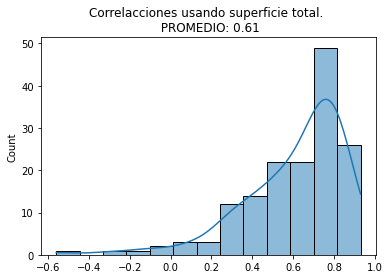

In [26]:
sns.histplot(data=corr_surf_total, kde=True)
plt.title(f'Correlacciones usando superficie total. \n PROMEDIO: {round(pd.Series(corr_surf_total).mean(), 2)}')

Text(0.5, 1.0, 'Correlacciones usando superficie cubierta. \n PROMEDIO: 0.71')

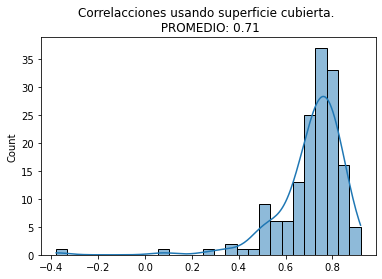

In [27]:
sns.histplot(data=corr_surf_covered,  kde=True)
plt.title(f'Correlacciones usando superficie cubierta. \n PROMEDIO: {round(pd.Series(corr_surf_covered).mean(), 2)}')

#### Conclusión: conviene utilizar la superficie cubierta. La correlación es mayor y además, la misma presenta menos valores nulos. 

#### Graficamos las correlaciones entre precio y superficie cubierta aperturado por property_type_alt y place_name_alt

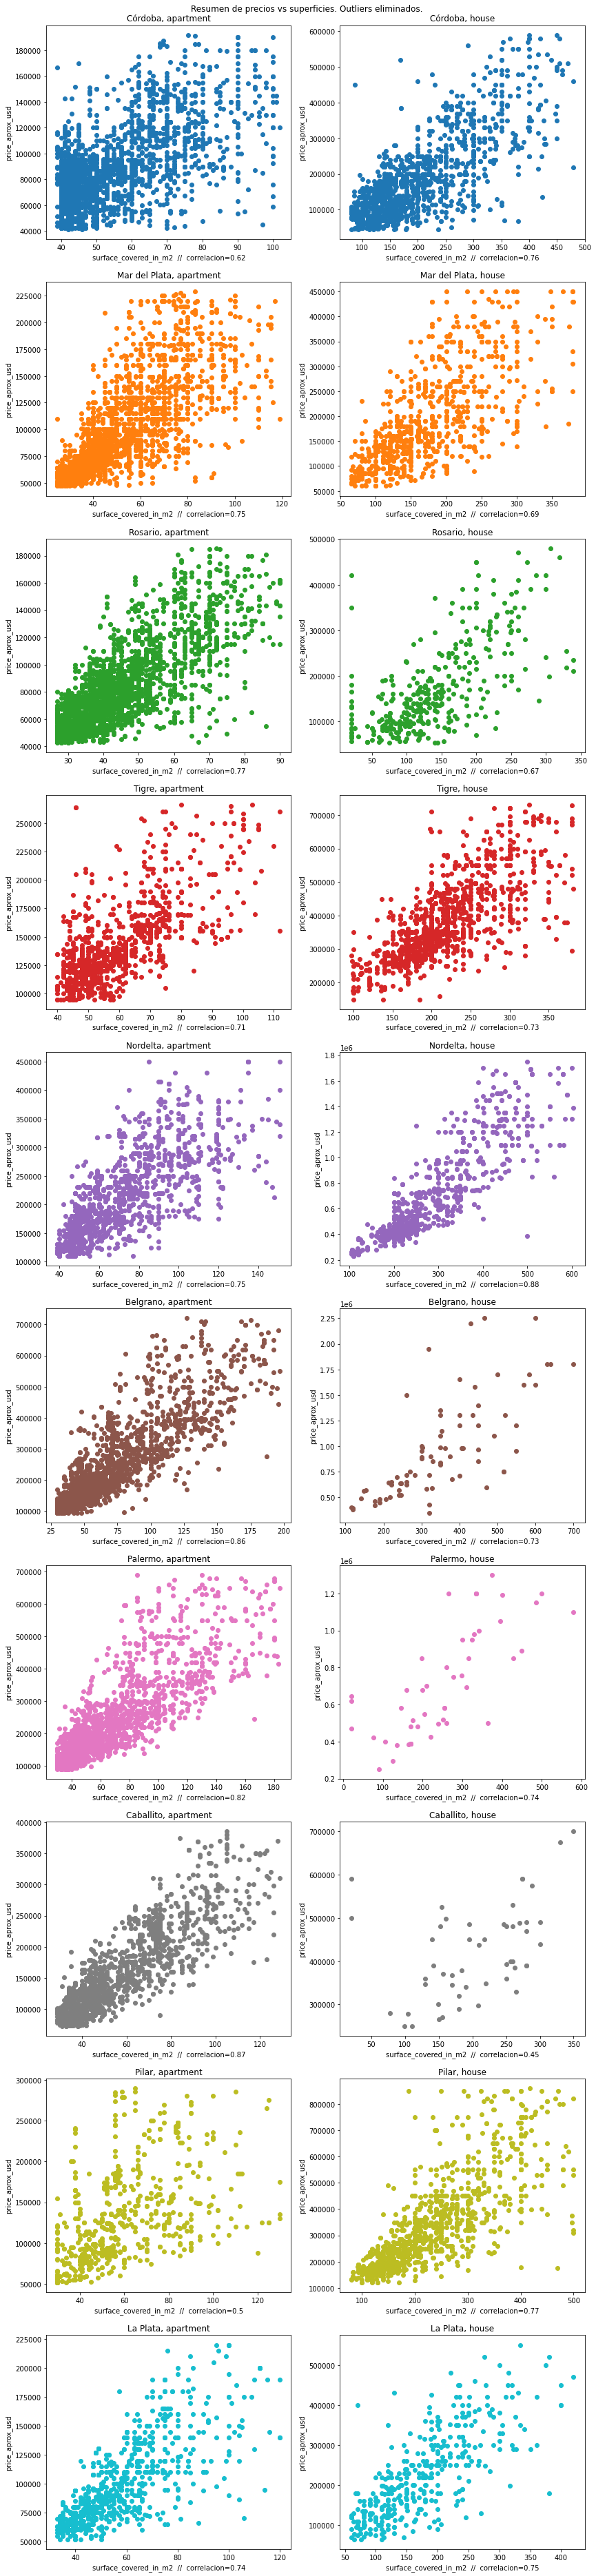

In [28]:
#Vamos a plotear, separando por groupby el data_clean
#levantamos el subplot. Seteamos la maxima cantidad de graficos que queremos ver.
count_graphs_max=10
len_tipo=len(iterar_tipo)
len_place=min(len(iterar_place), count_graphs_max)
fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#mapa de colores para que diferenciar por place
color_map=('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4')


#esto es el titulo
fig.suptitle(t="Resumen de precios vs superficies. Outliers eliminados.")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.973)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "j" para cada place
    i=0
    for place in iterar_place:
        if i>=count_graphs_max:
            break
        
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name_alt', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type_alt']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name_alt').filter(lambda x: all(x['place_name_alt']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type_alt').filter(lambda x: all(x['property_type_alt']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped = borrar_outliers(data_grouped, ('price_aprox_usd', 'surface_covered_in_m2'))
        
        #calculo corr para meter en el grafico
        corr_grafico =  data_grouped[['surface_covered_in_m2', 'price_aprox_usd']].corr()
        corr_grafico =  corr_grafico.iloc[0,1]
        corr_grafico = round(corr_grafico, 2)

        #seteo las condiciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
        axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].scatter( x=data_grouped['surface_covered_in_m2'], y=data_grouped['price_aprox_usd'], c=color_map[i%10])

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1

    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

#### Creamos variables en funcion a la variable descripción:

Nos proponemos encontrar amenities interesantes como Pileta, Parrilla, Cochera. 

In [29]:
_pattern = 'cochera|garage|auto'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['cochera'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


In [30]:
_pattern = 'piscina|pileta'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['pileta'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


In [31]:
_pattern = 'parrilla'
_express = re.compile(_pattern, flags = re.IGNORECASE)

data_clean['parrilla'] = regex_to_tags(data_clean['description'], _express, 'si', 'no')


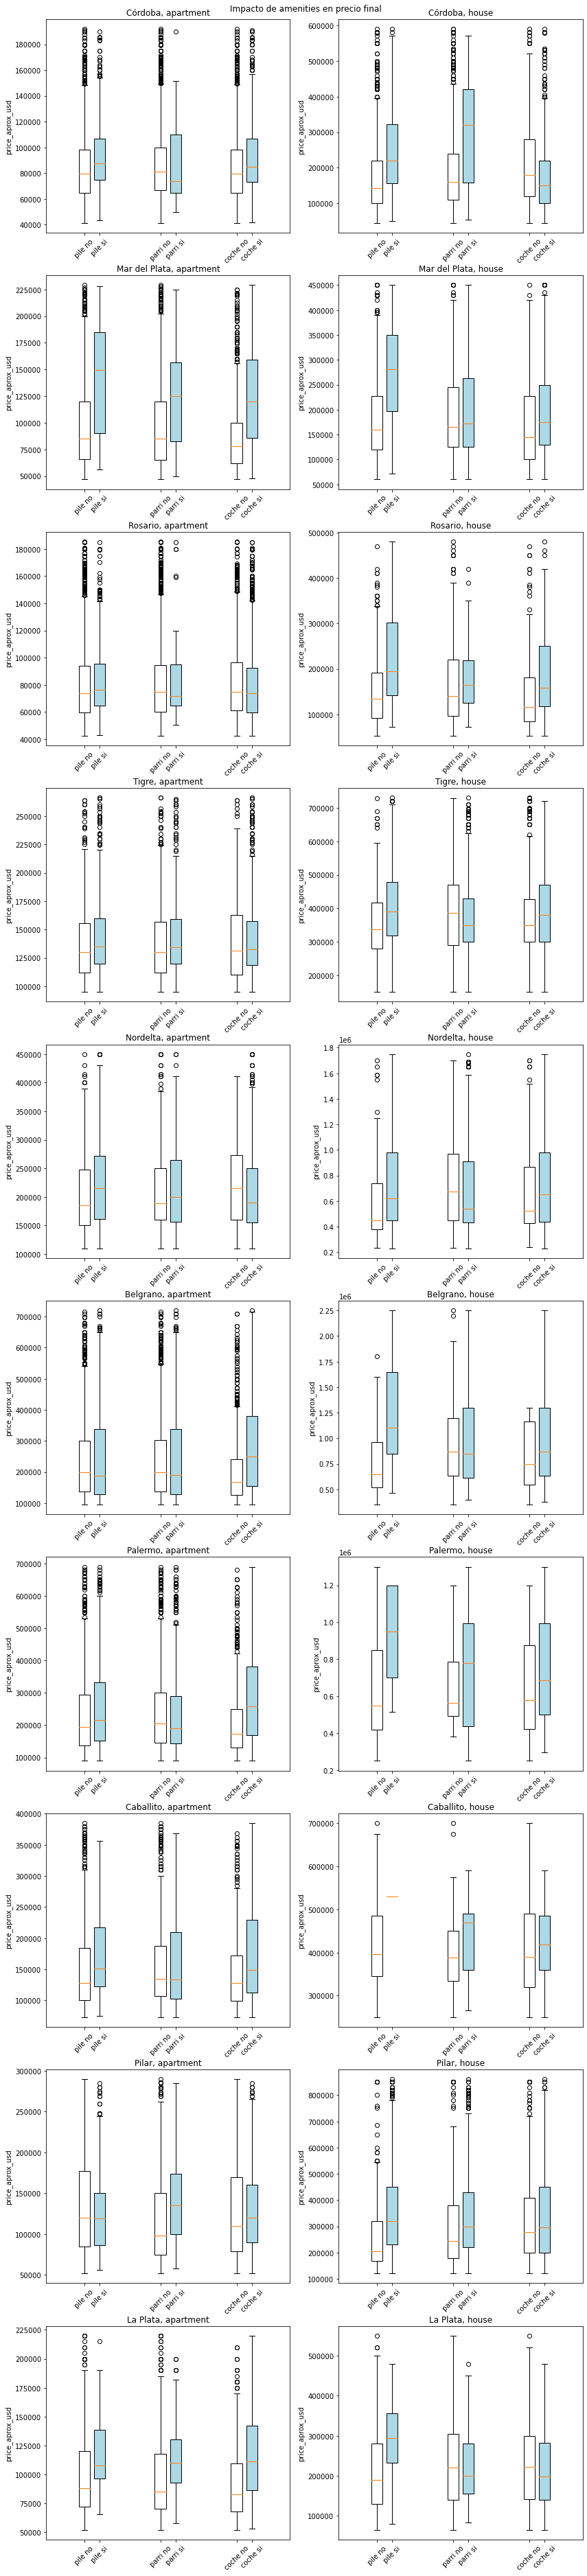

In [32]:
#Vamos a plotear, separando por groupby el data_clean

#levanto el subplot
count_graphs_max=10
len_tipo=len(iterar_tipo)
len_place=min(len(iterar_place),count_graphs_max)

fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))



#esto es el titulo
fig.suptitle(t="Impacto de amenities en precio final")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "i" para cada place
    i=0
    for place in iterar_place:
        if i>=count_graphs_max:
            break
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name_alt', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type_alt', 
                                           'cochera', 'pileta', 'parrilla']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name_alt').filter(lambda x: all(x['place_name_alt']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type_alt').filter(lambda x: all(x['property_type_alt']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped = borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        #empieza la parte divertida.
        amenities=['pileta', 'parrilla', 'cochera']
        aux=list(range(0,len(amenities)*2))
        count=0
        
        for amenity in amenities:
            aux[count]=data_grouped[data_grouped[amenity]=='no'].price_aprox_usd
            aux[count+1]=data_grouped[data_grouped[amenity]=='si'].price_aprox_usd
            count+=2

        axs[i,j].boxplot(x=[aux[0], aux[2], aux[4]], 
                       positions=[1,2,3], labels=['pile no', 'parri no', 'coche no'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"white"})

        axs[i,j].boxplot(x=[aux[1], aux[3], aux[5]], 
                       positions=[1.2,2.2,3.2], labels=['pile si', 'parri si', 'coche si'], 
                       patch_artist=True, widths=0.15,boxprops={'facecolor':"lightblue"})


        #seteo las decoraciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
#         axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].tick_params(axis= 'x', labelrotation=45)

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

#### En los casos en los que el boxplot por categoría difiere, podemos decir que encontramos relación respecto al precio de tener o no ese determinado amenitie. 

### Analisis para Cantidad de ambientes: 

##### Nos proponemos quitar de la descripción la cantidad de ambientes para llenar la variable rooms: 

In [33]:
_pattern = '([1-2][0-9]?)(?= amb)'
_express = re.compile(_pattern, flags = re.IGNORECASE)

work = regex_to_values(data['description'], _express)

data_clean['ambientes'] = work

print( "rooms     no nulos", data_clean['rooms'].notnull().sum() )
print( "ambientes no nulos", data_clean['ambientes'].notnull().sum() )
print( "agregar   no nulos", data_clean[data_clean['rooms'].isnull() & data_clean['ambientes'].notnull()].shape[0] )

pd.options.display.max_colwidth = 250 
data_clean[data_clean['ambientes'].notnull()][['rooms', 'ambientes', 'description']]

rooms     no nulos 39579
ambientes no nulos 15326
agregar   no nulos 7293


,rooms,ambientes,description
0,NaN,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CRE..."
2,NaN,2.0,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
11,NaN,1.0,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete, 2 Dormitorios con placard, Baño, Payrrom, lavadero, galeria.Independiente DEPTO 1 ambiente con cocina, baño Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web p..."
12,NaN,2.0,"EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON A PULMON DE MANZANA.A SOLO MEDIA CUADRA DE LA AV. SANTA FE.LIVING 3,06 X 5,30 DORMITORIO 2,80 X 3,60 BAÑO 1,55 X 2,11 COCINA ..."
60,2.0,2.0,ESPECTACULAR DEPARTAMENTO DE 2 AMBIENTES CON COCHERA PARA INVERSION. EN HERMOSA ZONA DE BELGRANO./NUÑEZ. ZONA MUY TRANQUILA. EL DEPTO ES UN HERMOSO 2 AMBIENTES BIEN DEFINIDOS CON MUY BUENOS DETALLES DE TERMINACION Y BUEN GUSTO. EL DEPTO ESTA UBIC...
...,...,...,...
121067,NaN,2.0,"BOCA - Av. Almte.Brown 800 - 2 amb -. 2do Piso -Muy luminoso- Bajas Exp.Muy buen estadoBaulera en espacio distribuidor : 3,50 x 4 mts (c/pisos cerámicos)Cocina c/lavadero integrado: 4 x 2 mts (pisos cerámicos)Dormitorio: 3 x 3 mts (piso parquet..."
121077,NaN,2.0,"2 ambientes al frente con balcón terraza y cochera fija Muy buen estado. mucha luzHall, living y dormitorio con salida al balcón , baño c/duchaAVISO LEGAL: Las descripciones arquitectónicas y funcionales, valores de expensas, impuestos y servic..."
121120,NaN,2.0,"Monoambiente divididoQuedando un hermoso 2 ambientes Scalabrini entre Gorriti y CabreraCocina incorporada, living/comedor, dormitorio, baño completo y balcón al frenteMuy luminoso2 Aires Split Frio/calorLosa radiante en BañoEdificio con seguridad..."
121138,NaN,2.0,VENTA CON RENTA DEPARTAMENTO DE 2 AMBIENTES A ESTRENAR EN SAAVEDRA - APTO CREDITOExcelente ubicación en zona residencial a metros de Av. Crisólogo Larralde y una cuadra de Av. Dr. Ricardo BalbínMuy buena luminosidad. Amplio living comedor con coc...


Completamos con 7892 casos extra a la variable "rooms"

In [34]:
data_clean['ambientes_final'] = data_clean['rooms']
mask = data_clean['ambientes_final'].isnull() & data_clean['ambientes'].notnull()
data_clean.loc[mask, 'ambientes_final'] = data_clean.loc[mask, 'ambientes']

In [35]:
corr = data_clean[['price_aprox_usd', 'surface_covered_in_m2', 'rooms', 'ambientes', 'ambientes_final']].corr()
corr.style.background_gradient (cmap = 'coolwarm')

,price_aprox_usd,surface_covered_in_m2,rooms,ambientes,ambientes_final
price_aprox_usd,1.000000,0.165531,0.182916,0.016871,0.199287
surface_covered_in_m2,0.165531,1.000000,0.152554,0.070113,0.157905
rooms,0.182916,0.152554,1.000000,0.280597,1.000000
ambientes,0.016871,0.070113,0.280597,1.000000,0.553599
ambientes_final,0.199287,0.157905,1.000000,0.553599,1.000000


Hacemos una matriz de correlación para observar cómo nos quedan las variables respecto al precio. 

#### Analisis Adicionales 

##### Quitamos solamente outliers de la variable Target y al resto de las variables en caso de tener valores nulos le imputamos la mediana.

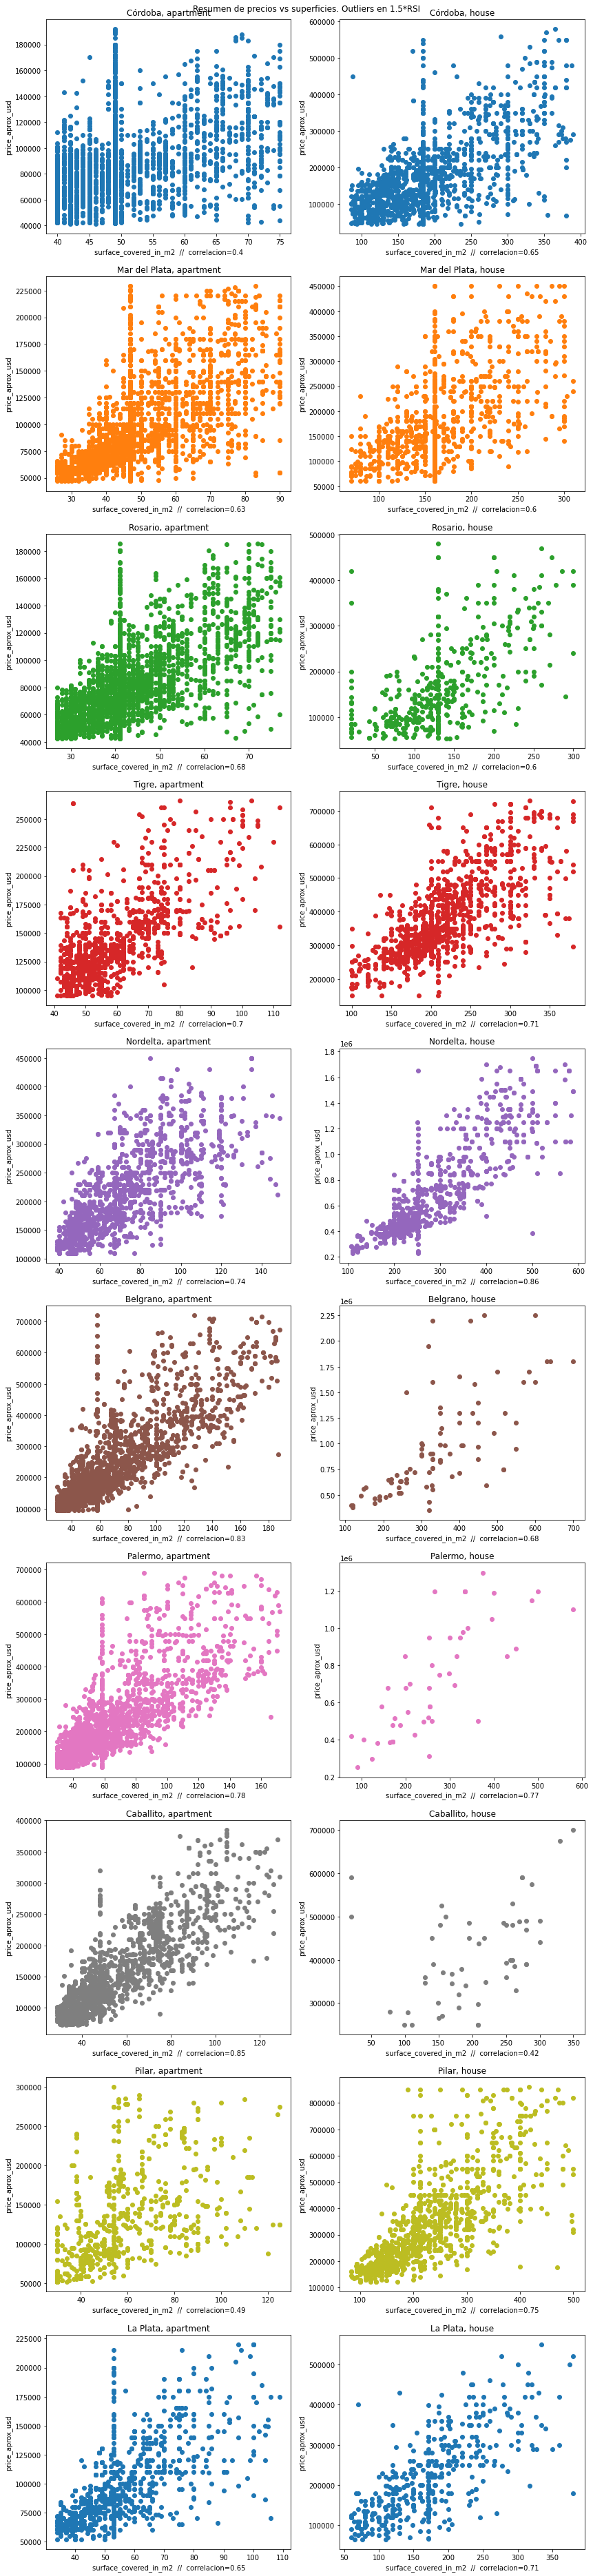

In [36]:
#Vamos a plotear, separando por groupby el data_clean

#levantamos el subplot. Seteamos la maxima cantidad de graficos que queremos ver.
count_graphs_max=10
len_tipo=len(iterar_tipo)
len_place=min(len(iterar_place), count_graphs_max)
fig, axs = plt.subplots(len_place,len_tipo, figsize=(7*len_tipo,6*len_place), facecolor=(1, 1, 1))

#mapa de colores para que diferenciar por place
color_map=('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#1f77b4')

#esto es el titulo
fig.suptitle(t="Resumen de precios vs superficies. Outliers en 1.5*RSI")

#posicion relativa de los graficos, para que no se vean tan apretados.
fig.subplots_adjust(top=0.975)

#Un "j" para cada tipo
j=0 
for tipo in iterar_tipo:
    
    #Un "i" para cada place
    i=0
    for place in iterar_place:
        if i>=count_graphs_max:
            break
            
        #reducimos para sacar todo lo que no nos sirve.
        data_reducida = data_clean.loc[:, ['place_name', 'price_aprox_usd', 'surface_covered_in_m2', 'property_type']]
        
        #agrupamos la data. filtrando por cada place.
        data_grouped = data_reducida.groupby(by = 'place_name').filter(lambda x: all(x['place_name']==place))

        #volvemos a agrupar la data. filtrando por cada tipo.
        data_grouped = data_grouped.groupby(by = 'property_type').filter(lambda x: all(x['property_type']==tipo))
        
        #aplico el filtro de ouliers para cada grupo
        data_grouped_temp = borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        #Prueba de relleno de NaN: Aca lo que vamos a hacer es llenar todos los nan por la media.
        valor_para_nan = data_grouped_temp['surface_covered_in_m2'].median()
        data_grouped['surface_covered_in_m2'] = data_grouped['surface_covered_in_m2'].fillna(valor_para_nan)
        data_grouped=borrar_outliers(data_grouped, ('price_aprox_usd','surface_covered_in_m2'))
        
        
        #calculo corr para meter en el grafico (si, esto no deberia estar aca... sacar, eventualmente)
        corr_grafico =  data_grouped[['surface_covered_in_m2', 'price_aprox_usd']].corr()
        corr_grafico =  corr_grafico.iloc[0,1]
        corr_grafico = round(corr_grafico, 2)

        #seteo las condiciones para cada axs[i,j]
        axs[i,j].set_title(f'{place}, {tipo}')
        axs[i,j].set_xlabel(f'surface_covered_in_m2  //  correlacion={corr_grafico}')
        axs[i,j].set_ylabel('price_aprox_usd')
        axs[i,j].scatter( x=data_grouped['surface_covered_in_m2'], y=data_grouped['price_aprox_usd'], c=color_map[i%10])

        #vamos al siguiente place. Muevo hacia abajo en el plot
        i+=1
    #vamos a siguiente tipo Muevo hacia la derecha en el plot
    j+=1

#### Queda demostrado graficamente que no nos sirve completar con la mediana porque distorsiona mucho la tendencia. 